In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.decomposition import PCA

#importing metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [175]:
df= pd.read_csv("C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 3\\playground-series-s3e6\\train.csv")

In [176]:
df.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


## EDA (Exploratory Data Analysis)

In [177]:
df.shape

(22730, 18)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [179]:
df.nunique()

id                   22730
squareMeters          7319
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 101
cityCode              7810
cityPartRange           10
numPrevOwners           10
made                    33
isNewBuilt               2
hasStormProtector        2
basement              4903
attic                 5167
garage                 896
hasStorageRoom           2
hasGuestRoom            11
price                 7421
dtype: int64

In [180]:
df.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22730.0,1.136450e+04,6.561730e+03,0.0,5682.25,11364.5,17046.75,22729.0
squareMeters,22730.0,4.658622e+04,4.952124e+04,89.0,20392.75,44484.0,71547.00,6071330.0
numberOfRooms,22730.0,4.824109e+01,2.822643e+01,1.0,25.00,47.0,75.00,100.0
hasYard,22730.0,4.758909e-01,4.994294e-01,0.0,0.00,0.0,1.00,1.0
hasPool,22730.0,4.527497e-01,4.977733e-01,0.0,0.00,0.0,1.00,1.0
floors,22730.0,4.730598e+01,4.777721e+01,1.0,25.00,45.0,69.00,6000.0
cityCode,22730.0,5.001380e+04,3.000664e+04,3.0,22936.00,50414.0,76291.00,491100.0
cityPartRange,22730.0,5.585042e+00,2.739533e+00,1.0,3.00,6.0,8.00,10.0
numPrevOwners,22730.0,5.620766e+00,2.713026e+00,1.0,3.00,6.0,8.00,10.0
made,22730.0,2.008005e+03,1.188268e+02,1990.0,2000.00,2006.0,2014.00,10000.0


In [182]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22725    False
22726    False
22727    False
22728    False
22729    False
Length: 22730, dtype: bool

<AxesSubplot:>

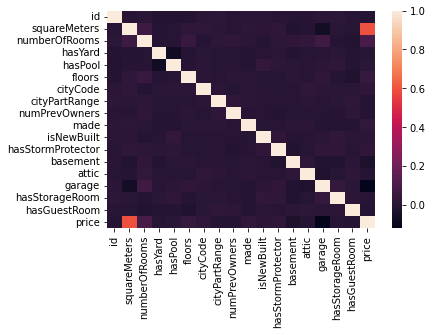

In [183]:
corr=df.corr()
sns.heatmap(corr)

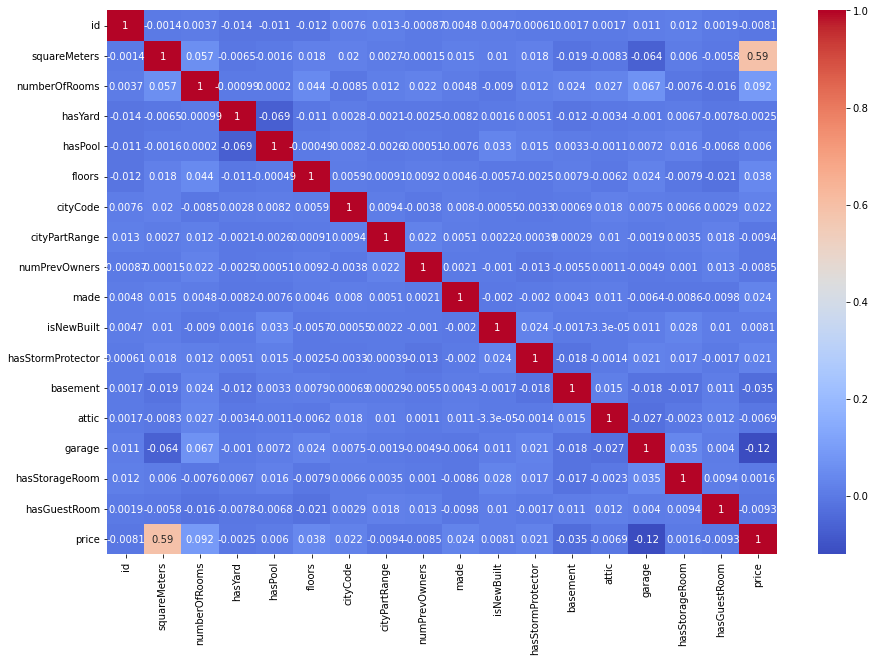

In [184]:
# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Create the heatmap using the seaborn library
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [185]:
dtypes=df.dtypes

In [186]:
dtypes

id                     int64
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [187]:
df.drop(["id","cityCode","made"],axis=1,inplace=True)

In [188]:
# Differentiate categorical and numerical columns
cat_cols = []
num_cols = []

for col in dtypes.index:
    if pd.api.types.is_object_dtype(dtypes[col]):
        cat_cols.append(col)
    else:
        num_cols.append(col)

# Print the result
print('Categorical columns:', cat_cols)
print('Numerical columns:', num_cols)

Categorical columns: []
Numerical columns: ['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']


## Splitting the data

In [189]:
#Dependent and Independent variable
X=df.drop("price", axis=1)
y=df["price"]

In [190]:
print(X)

       squareMeters  numberOfRooms  hasYard  hasPool  floors  cityPartRange  \
0             34291             24        1        0      47              2   
1             95145             60        0        1      60              1   
2             92661             45        1        1      62              4   
3             97184             99        0        0      59              1   
4             61752            100        0        0      57              8   
...             ...            ...      ...      ...     ...            ...   
22725         55825             84        1        0      70              3   
22726         65870             88        1        0      49              9   
22727         93192             42        1        0      39             10   
22728         65797             86        1        0      89              2   
22729         82244             18        1        0      38              1   

       numPrevOwners  isNewBuilt  hasStormProtector

In [191]:
print(y)

0        3436795.2
1        9519958.0
2        9276448.1
3        9725732.2
4        6181908.8
           ...    
22725    5594137.1
22726    6594705.0
22727    9321511.4
22728    6584708.2
22729    8231424.8
Name: price, Length: 22730, dtype: float64


In [192]:
#Spliting the training and Testing data
test_size = 0.25
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state = 20)

In [193]:
#Printing the shape of training and Testing Data
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_val shape {}, len {}.".format(X_val.shape,len(X_val)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_val shape {}, len {}.".format(y_val.shape,len(y_val)))

X_train shape (17047, 14), len 17047.
X_val shape (5683, 14), len 5683.
y_train shape (17047,), len 17047.
y_val shape (5683,), len 5683.


## Model Building

In [194]:
##Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [195]:
rfr = RandomForestRegressor()

In [196]:
rfr = rfr.fit(X_train, y_train)

In [197]:
y_train_preds = rfr.predict(X_train)
y_train_preds[0:10]

array([6152521.09400001, 7885122.257     , 4435076.54499999,
        250477.71      , 2747708.313     , 4872872.79399999,
       4884933.44599999, 4881817.36299999, 5752848.774     ,
       2060734.29      ])

In [198]:
y_val_preds = rfr.predict(X_val)
y_val_preds[0:10]

array([ 989746.461     , 6223780.092     , 5529595.21799999,
       4320432.287     , 5012142.974     , 5049167.395     ,
       8341851.141     , 7298818.03200001, 1467850.788     ,
       7323685.15      ])

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the regression error metrics
mae = mean_absolute_error(y_train, y_train_preds)
mse = mean_squared_error(y_train, y_train_preds)
rmse = mean_squared_error(y_train, y_train_preds, squared=False)
r2 = r2_score(y_train, y_train_preds)

    # Print the report
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Absolute Error: 4393.163
Mean Squared Error: 4920067571.628
Root Mean Squared Error: 70143.193
R-squared: 0.999


## XGBoost

In [200]:
from xgboost import XGBRegressor

In [201]:
xgr = XGBRegressor()

In [202]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5]
}

In [203]:
grid_search = GridSearchCV(estimator=xgr, param_grid=param_grid, cv=5)

In [204]:
xgr = XGBRegressor(gamma= 0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100)
xgr = xgr.fit(X_train, y_train)

In [205]:
y_train_preds = xgr.predict(X_train)
y_train_preds[0:10]

array([6167608.  , 7835852.  , 4436756.5 ,  378799.28, 2750802.  ,
       4863875.5 , 4889811.5 , 4887850.  , 5752941.5 , 2059107.  ],
      dtype=float32)

In [206]:
y_val_preds = xgr.predict(X_val)
y_val_preds[0:10]

array([ 989956.4, 6226375. , 5542424. , 4320777.5, 5018862. , 5045661. ,
       8347649. , 7301147.5, 1468643.8, 7310559.5], dtype=float32)

In [207]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the regression error metrics
mae = mean_absolute_error(y_train, y_train_preds)
mse = mean_squared_error(y_train, y_train_preds)
rmse = mean_squared_error(y_train, y_train_preds, squared=False)
r2 = r2_score(y_train, y_train_preds)

    # Print the report
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Absolute Error: 6334.435
Mean Squared Error: 362159592.617
Root Mean Squared Error: 19030.491
R-squared: 1.000


## Importing the test data

In [208]:
df_test= pd.read_csv("C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 3\\playground-series-s3e6\\test.csv")

In [209]:
df_test

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,37882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


In [210]:
label = df_test.filter(["id"], axis=1)
label

,id
0,22730
1,22731
2,22732
3,22733
4,22734
...,...
15149,37879
15150,37880
15151,37881
15152,37882


In [211]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [212]:
df_test.drop(["id","cityCode","made"],axis=1,inplace=True)

In [213]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,15154.0,45729.407681,29200.142520,69.0,19189.00,43802.0,70898.00,99999.0
numberOfRooms,15154.0,47.874951,28.164077,1.0,25.00,46.0,75.00,100.0
hasYard,15154.0,0.483371,0.499740,0.0,0.00,0.0,1.00,1.0
hasPool,15154.0,0.445361,0.497022,0.0,0.00,0.0,1.00,1.0
floors,15154.0,46.401148,27.000547,1.0,25.00,44.0,69.00,100.0
cityPartRange,15154.0,5.616933,2.727914,1.0,3.00,6.0,8.00,10.0
numPrevOwners,15154.0,5.602547,2.718316,1.0,3.00,6.0,8.00,10.0
isNewBuilt,15154.0,0.472219,0.499244,0.0,0.00,0.0,1.00,1.0
hasStormProtector,15154.0,0.463442,0.498678,0.0,0.00,0.0,1.00,1.0
basement,15154.0,5299.415468,2980.156234,8.0,3114.00,5359.0,7739.00,89016.0


In [214]:
df_test.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,47580,89,0,1,8,5,3,0,0,6885,8181,241,0,8
1,62083,38,0,0,87,10,3,1,1,4601,9237,393,1,4
2,90499,75,1,1,37,9,6,0,1,7454,2680,305,0,2
3,16354,47,1,1,9,6,5,1,1,705,5097,122,1,5
4,67510,8,0,0,55,3,7,1,1,3715,7979,401,1,9


In [215]:
df_test.nunique()

squareMeters         6433
numberOfRooms         100
hasYard                 2
hasPool                 2
floors                100
cityPartRange          10
numPrevOwners          10
isNewBuilt              2
hasStormProtector       2
basement             4216
attic                4558
garage                881
hasStorageRoom          2
hasGuestRoom           11
dtype: int64

In [216]:
df_test.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

In [217]:
df_test.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityPartRange', 'numPrevOwners', 'isNewBuilt', 'hasStormProtector',
       'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'],
      dtype='object')

In [218]:
df_test.dtypes

squareMeters         int64
numberOfRooms        int64
hasYard              int64
hasPool              int64
floors               int64
cityPartRange        int64
numPrevOwners        int64
isNewBuilt           int64
hasStormProtector    int64
basement             int64
attic                int64
garage               int64
hasStorageRoom       int64
hasGuestRoom         int64
dtype: object

## Model prediction on test data

In [219]:
##XG Boost

In [220]:
xgr_preds = xgr.predict(df_test)
xgr_preds[0:10]

array([4767476.   , 6215421.   , 9046345.   , 1645823.1  , 6759781.5  ,
        118693.664, 9915913.   , 5266507.5  , 5573868.5  , 9828252.   ],
      dtype=float32)

In [221]:
len(xgr_preds)

15154

In [222]:
label["price"] = xgr_preds
label["price"][0:10]

0    4.767476e+06
1    6.215421e+06
2    9.046345e+06
3    1.645823e+06
4    6.759782e+06
5    1.186937e+05
6    9.915913e+06
7    5.266508e+06
8    5.573868e+06
9    9.828252e+06
Name: price, dtype: float32

In [225]:
label

,id,price
0,22730,4767476.000
1,22731,6215421.000
2,22732,9046345.000
3,22733,1645823.125
4,22734,6759781.500
...,...,...
15149,37879,8618893.000
15150,37880,4593025.500
15151,37881,7362357.500
15152,37882,7750075.000
